In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical
from keras import backend as K

from cleverhans.attacks import FastGradientMethod
from cleverhans.utils_keras import KerasModelWrapper

from collections import Counter
import sys
sys.path.append('../Final_notebook/')
import proj_utils as utils

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_test_tmp = np.squeeze(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
model = load_model('../Saved_models/good_models/cifar10/cifar10_vgg_like_175.h5')

dog


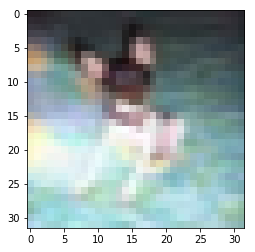

In [9]:
#421
i = 1548
img = x_test[i]
img_label_ohc = y_test[i]
print(utils.CIFAR10_LABEL_NAMES[y_test_tmp[i]])
plt.imshow(img)

In [5]:
preds = model.predict(np.expand_dims(img, axis=0))
utils.decode_cifar10_preds(preds)

[[('dog', 0.8406054), ('cat', 0.10133565), ('deer', 0.039897747)]]

In [6]:
K.set_learning_phase(0)
ch_model = KerasModelWrapper(model)
fgsm = FastGradientMethod(ch_model, sess=K.get_session())
fgsm_params = {'eps': 3.0/255,
               'clip_min': 0.0,
               'clip_max': 1.0}

In [7]:
adv = fgsm.generate_np(np.expand_dims(img, axis=0), **fgsm_params)[0]

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



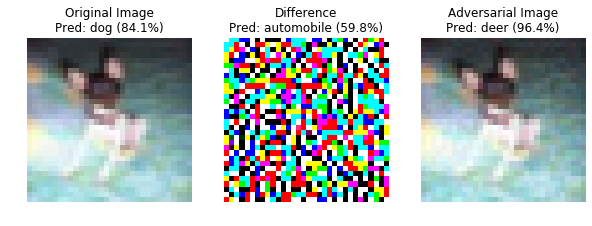

In [8]:
utils.plot_pair(img, adv, model=model)

Unique Values:
['bird', 'cat', 'deer', 'dog', 'frog']


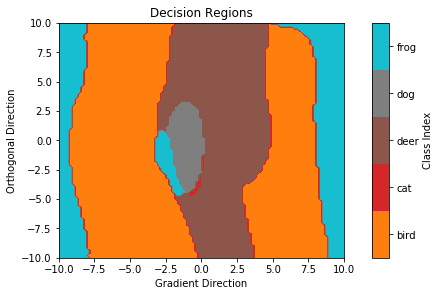

In [10]:
utils.decision_regions(img, model, img_label=img_label_ohc, bounds=(-12, 12), num=100, seed=42, cmap='tab10')

[[('frog', 0.92830276), ('automobile', 0.025282156), ('bird', 0.018631434)]]


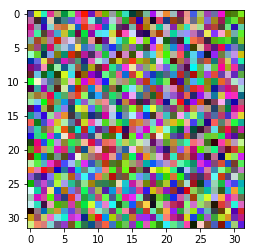

In [11]:
rand = np.random.rand(1, 32, 32, 3)
plt.imshow(rand[0])
print(utils.decode_cifar10_preds(model.predict(rand)))

In [2]:
model = load_model('../Saved_models/good_models/oid_3class/oid_3class_xception_083.h5')

In [3]:
x_test, y_test = utils.load_oid3class_data()

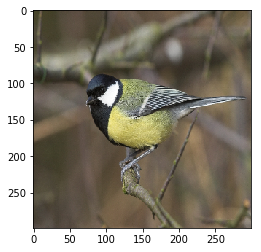

In [4]:
i = 2
img = x_test[i]
img_label_ohc = y_test[i]
plt.imshow(img)

In [5]:
model.predict(np.expand_dims(img, axis=0))

array([[9.9591947e-01, 5.3485163e-04, 3.5456084e-03]], dtype=float32)

In [6]:
K.set_learning_phase(0)
ch_model = KerasModelWrapper(model)
fgsm = FastGradientMethod(ch_model, sess=K.get_session())
fgsm_params = {'eps': 0.371/255,
               'clip_min': 0.0,
               'clip_max': 1.0}
adv = fgsm.generate_np(np.expand_dims(img, axis=0), **fgsm_params)[0]

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



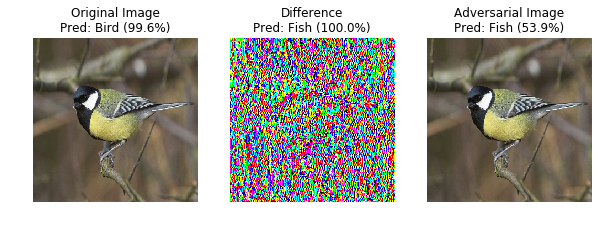

In [7]:
utils.plot_pair(img, adv, model=model)

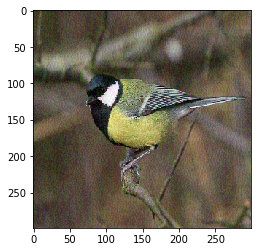

Unique Values:
['Bird', 'Cat', 'Fish']


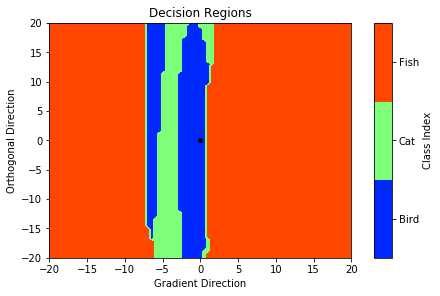

Counter({2: 4477, 0: 731, 1: 417})


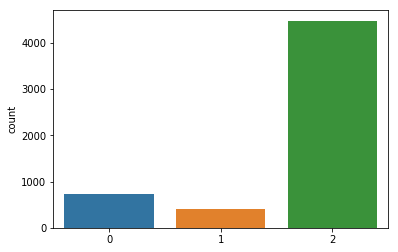

In [9]:
utils.decision_regions(img, model, img_label=img_label_ohc, bounds=(-20, 20),
                       num=75, seed=42, plot_origin=True, img_ref=True, countplot=True)

In [9]:
x = y = np.linspace(0, 5, 5)
xx, yy = np.meshgrid(x, y)
z = np.c_[xx.flatten(), yy.flatten()]